In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

In [2]:
data_1 = TabularDataset('Dataset_AutoML.csv').drop(['Sequence'],axis=1)
#data=data.drop(['Anti_Sa'], axis=1)
data_1.head()

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,15,0.333,0.333,0.333,0.180164,0.267333,0.46,0.81,4,11.85,...,33.333,40.000,20.000,20.000,53.333,46.667,33.333,33.333,0.000,2
1,16,0.688,0.188,0.562,0.526107,0.426250,1.28,-0.34,5,11.28,...,31.250,37.500,56.250,6.250,62.500,37.500,31.250,31.250,0.000,1
2,13,0.538,0.231,0.615,0.846486,0.315385,2.61,0.44,4,11.87,...,0.000,15.385,30.769,15.385,46.154,53.846,46.154,38.462,7.692,2
3,12,0.500,0.083,0.333,0.782014,0.192500,2.61,0.71,4,11.87,...,0.000,16.667,33.333,8.333,41.667,58.333,50.000,41.667,8.333,2
4,17,0.529,0.176,0.294,0.771108,0.377647,2.36,0.09,4,11.88,...,5.882,29.412,35.294,11.765,52.941,47.059,35.294,29.412,5.882,2


# BorderlineSMOTE

In [3]:
Feature=pd.DataFrame(data_1.drop(['Label'], axis=1))
Lab=data_1['Label']
Lab=pd.DataFrame(Lab)

In [4]:
smo = BorderlineSMOTE(random_state=42)
x_smo, y_smo = smo.fit_resample(Feature,Lab)
x_smo=pd.DataFrame(x_smo)
smo=pd.merge(x_smo,y_smo,left_index=True, right_index=True)
smo

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,15,0.333000,0.333000,0.333000,0.180164,0.267333,0.460000,0.810000,4,11.850000,...,33.333000,40.000000,20.000000,20.000000,53.333000,46.667000,33.333000,33.333000,0.000000,2
1,16,0.688000,0.188000,0.562000,0.526107,0.426250,1.280000,-0.340000,5,11.280000,...,31.250000,37.500000,56.250000,6.250000,62.500000,37.500000,31.250000,31.250000,0.000000,1
2,13,0.538000,0.231000,0.615000,0.846486,0.315385,2.610000,0.440000,4,11.870000,...,0.000000,15.385000,30.769000,15.385000,46.154000,53.846000,46.154000,38.462000,7.692000,2
3,12,0.500000,0.083000,0.333000,0.782014,0.192500,2.610000,0.710000,4,11.870000,...,0.000000,16.667000,33.333000,8.333000,41.667000,58.333000,50.000000,41.667000,8.333000,2
4,17,0.529000,0.176000,0.294000,0.771108,0.377647,2.360000,0.090000,4,11.880000,...,5.882000,29.412000,35.294000,11.765000,52.941000,47.059000,35.294000,29.412000,5.882000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,13,0.251248,0.284921,0.193274,0.433728,0.017508,1.075474,1.715166,3,10.966548,...,16.914110,25.123816,16.914110,5.307890,27.529890,72.470110,35.739596,30.431706,5.307890,3
2129,11,0.636000,0.674281,0.280543,0.643604,0.542304,1.996631,-1.203528,1,10.663687,...,35.610435,54.545000,53.791518,0.753565,71.973435,28.026565,18.935565,18.182000,0.753565,3
2130,10,0.642475,0.270912,0.407351,0.759082,0.566636,2.285107,-0.775674,0,8.199118,...,16.754523,37.994461,41.622710,13.126746,64.248010,35.751990,32.123741,18.997467,13.126746,3
2131,13,0.735402,0.077000,0.548241,0.579371,0.711779,1.744363,-1.391646,2,10.707453,...,30.769000,49.510295,53.846000,12.028268,76.923000,23.077000,15.385000,15.385000,0.000000,3


In [5]:
data=smo

# AutoGluon

In [6]:
train_data,test_data=train_test_split(data, test_size=0.2,random_state=0)
train_data.head()

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
1018,17,0.471,0.529,0.529,0.492396,0.392353,1.63,-0.22,0,5.69,...,35.294,64.706,41.176,0.000,58.824,41.176,11.765,5.882,5.882,2
634,12,0.667,0.667,0.250,0.432947,0.515000,1.28,-0.22,5,12.58,...,0.000,25.000,50.000,8.333,58.333,41.667,41.667,41.667,0.000,1
486,13,0.231,0.077,0.615,0.422325,0.080000,1.51,2.05,6,12.80,...,0.000,38.462,15.385,0.000,53.846,46.154,46.154,46.154,0.000,3
1344,16,0.375,0.688,0.188,0.557431,0.007500,1.56,1.62,5,12.13,...,25.000,50.000,18.750,12.500,43.750,56.250,43.750,37.500,6.250,1
521,11,0.636,0.636,0.364,0.488118,0.790000,1.95,-0.37,3,11.10,...,9.091,18.182,36.364,18.182,72.727,27.273,27.273,27.273,0.000,2


In [7]:
label='Label'
print("Summary of antisa activity coulum: \n", train_data['Label'].describe())
print("Summary of antisa activity coulum: \n", test_data['Label'].describe())

Summary of antisa activity coulum: 
 count    1706.000000
mean        1.991794
std         0.813336
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Label, dtype: float64
Summary of antisa activity coulum: 
 count    427.000000
mean       2.032787
std        0.830098
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Label, dtype: float64


In [9]:
save_path = 'anticp'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, num_bag_folds=10, num_bag_sets=1, num_stack_levels=1, presets='best_quality')
results = predictor.fit_summary()

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=10, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "anticp\"
AutoGluon Version:  0.5.2
Python Version:     3.7.6
Operating System:   Windows
Train Data Rows:    1706
Train Data Columns: 94
Label Column: Label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 1, 3]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2935.72 MB
	Train Data (Original)  Memory Usage: 1.28 MB (0.0% of available memory)
	Inferring 

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.782532       5.572480  1570.937483                0.000998           0.422870            3       True         26
1         LightGBMXT_BAG_L2   0.781360       4.804499  1059.670244                0.165541          45.707566            2       True         16
2           LightGBM_BAG_L2   0.777843       4.757654  1086.411857                0.118696          72.449180            2       True         17
3            XGBoost_BAG_L2   0.776671       4.876315  1125.493295                0.237357         111.530618            2       True         23
4           CatBoost_BAG_L2   0.773740       4.728718  1339.040504                0.089760         325.077826            2       True         20
5     NeuralNetTorch_BAG_L2   0.768464       5.152657  1049.553463  

In [10]:
y_test = test_data[label]
test_data_nolab= test_data.drop(columns=[label])
test_data_nolab.head()

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,MSWHIM3,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.
1968,12,0.580472,0.090616,0.412766,0.369876,0.511615,0.640159,0.051219,3,10.982689,...,-0.194335,16.836223,24.915373,41.751596,16.328524,58.248404,41.751596,33.502253,33.333,0.169253
379,15,0.533000,0.600000,0.533000,0.319952,0.597333,1.030000,-0.240000,3,11.560000,...,-0.226667,13.333000,33.333000,26.667000,20.000000,60.000000,40.000000,20.000000,20.000,0.000000
689,12,0.833000,0.083000,0.583000,0.293332,0.720000,1.090000,-1.110000,3,11.800000,...,-0.101667,25.000000,50.000000,58.333000,8.333000,75.000000,25.000000,25.000000,25.000,0.000000
935,13,0.615000,0.692000,0.231000,0.099480,0.663077,0.180000,0.640000,5,12.180000,...,0.050769,7.692000,7.692000,30.769000,23.077000,53.846000,46.154000,38.462000,38.462,0.000000
252,18,0.278000,0.222000,0.444000,0.370852,-0.024444,1.080000,1.420000,-2,3.980000,...,-0.401111,22.222000,50.000000,5.556000,16.667000,44.444000,55.556000,44.444000,16.667,27.778000


In [11]:
predictor=TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
print("GT: \n", y_test)
performance = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)


Bad key "text.kerning_factor" on line 4 in
F:\anaconda\install\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Evaluation: accuracy on test data: 0.7681498829039812
Evaluations on test data:
{
    "accuracy": 0.7681498829039812,
    "balanced_accuracy": 0.7648211437685122,
    "mcc": 0.6523076361572492
}


Predictions: 
 1968    3
379     1
689     2
935     1
252     3
       ..
666     2
459     3
596     3
376     1
1257    3
Name: Label, Length: 427, dtype: int64
GT: 
 1968    3
379     2
689     2
935     1
252     3
       ..
666     1
459     3
596     3
376     1
1257    3
Name: Label, Length: 427, dtype: int64


In [12]:
res_leaderboard=predictor.leaderboard(test_data,extra_metrics=['accuracy',
                                               'f1_macro','f1_micro',
                                               'roc_auc_ovo_macro',
                                               'precision_macro','precision_micro',
                                               'recall_macro','recall_micro'], silent=True)
res_leaderboard

,model,score_test,accuracy,f1_macro,f1_micro,roc_auc_ovo_macro,precision_macro,precision_micro,recall_macro,recall_micro,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_BAG_L2,0.779859,0.779859,0.775877,0.779859,0.910866,0.776071,0.779859,0.776509,0.779859,0.776671,3.897621,4.876315,1125.493295,0.371360,0.237357,111.530618,2,True,23
1,LightGBM_BAG_L2,0.772834,0.772834,0.768380,0.772834,0.908668,0.768198,0.772834,0.768649,0.772834,0.777843,3.753652,4.757654,1086.411857,0.227392,0.118696,72.449180,2,True,17
2,ExtraTreesEntr_BAG_L2,0.768150,0.768150,0.763633,0.768150,0.904650,0.763769,0.768150,0.764354,0.768150,0.744431,3.712195,4.843409,1014.951010,0.185935,0.204451,0.988333,2,True,22
3,LightGBMLarge_BAG_L2,0.768150,0.768150,0.763207,0.768150,0.901715,0.763060,0.768150,0.763511,0.768150,0.766120,3.841414,4.758625,1192.308204,0.315154,0.119667,178.345527,2,True,25
4,LightGBMXT_BAG_L2,0.768150,0.768150,0.763939,0.768150,0.912400,0.764336,0.768150,0.764821,0.768150,0.781360,3.846406,4.804499,1059.670244,0.320146,0.165541,45.707566,2,True,16
5,WeightedEnsemble_L3,0.768150,0.768150,0.763939,0.768150,0.912389,0.764336,0.768150,0.764821,0.768150,0.782532,4.726552,5.572480,1570.937483,0.009972,0.000998,0.422870,3,True,26
6,RandomForestGini_BAG_L2,0.763466,0.763466,0.759120,0.763466,0.902991,0.759703,0.763466,0.759934,0.763466,0.753810,3.669509,4.853374,1015.458824,0.143249,0.214416,1.496146,2,True,18
7,CatBoost_BAG_L2,0.761124,0.761124,0.757251,0.761124,0.907104,0.757442,0.761124,0.757610,0.761124,0.773740,3.651377,4.728718,1339.040504,0.125116,0.089760,325.077826,2,True,20
8,NeuralNetFastAI_BAG_L2,0.761124,0.761124,0.755941,0.761124,0.902931,0.756541,0.761124,0.757337,0.761124,0.766120,4.402983,6.103992,1050.464972,0.876722,1.465034,36.502294,2,True,15
9,ExtraTreesGini_BAG_L2,0.756440,0.756440,0.752005,0.756440,0.902735,0.752381,0.756440,0.752882,0.756440,0.743845,3.714089,4.917056,1014.900878,0.187828,0.278098,0.938200,2,True,21


In [13]:
model_best=predictor.get_model_best()
model_best

'WeightedEnsemble_L3'

In [14]:
predictor.get_model_names()

['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'NeuralNetFastAI_BAG_L1',
 'LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'RandomForestGini_BAG_L1',
 'RandomForestEntr_BAG_L1',
 'CatBoost_BAG_L1',
 'ExtraTreesGini_BAG_L1',
 'ExtraTreesEntr_BAG_L1',
 'XGBoost_BAG_L1',
 'NeuralNetTorch_BAG_L1',
 'LightGBMLarge_BAG_L1',
 'WeightedEnsemble_L2',
 'NeuralNetFastAI_BAG_L2',
 'LightGBMXT_BAG_L2',
 'LightGBM_BAG_L2',
 'RandomForestGini_BAG_L2',
 'RandomForestEntr_BAG_L2',
 'CatBoost_BAG_L2',
 'ExtraTreesGini_BAG_L2',
 'ExtraTreesEntr_BAG_L2',
 'XGBoost_BAG_L2',
 'NeuralNetTorch_BAG_L2',
 'LightGBMLarge_BAG_L2',
 'WeightedEnsemble_L3']

In [15]:
specific_model = predictor._trainer.load_model(model_best)
model_info = specific_model.get_info()
model_info

{'name': 'WeightedEnsemble_L3',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'multiclass',
 'eval_metric': 'accuracy',
 'stopping_metric': 'accuracy',
 'fit_time': 0.4228701591491699,
 'num_classes': 3,
 'quantile_levels': None,
 'predict_time': 0.0009975433349609375,
 'val_score': 0.7825322391559203,
 'hyperparameters': {'use_orig_features': False,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'drop_unique': False},
 'num_features': 15,
 'features': ['RandomForestEntr_BAG_L2_1',
  'LightGBM_BAG_L2_1',
  

In [16]:
model_pred=predictor.predict(test_data_nolab,model=model_best)

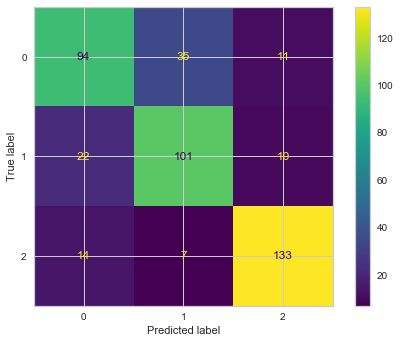

In [17]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam
from yellowbrick.datasets import load_credit
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#AUC_fig=ROCAUC(model_best,test_data_nolab, test_data[label],classes=["No acvtivity","Activity"])
#RocCurveDisplay.from_predictions(y_test, model_pred)
cm=confusion_matrix(y_test,model_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()

In [18]:
y_probas=predictor.predict_proba(test_data_nolab)

F:\anaconda\install\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


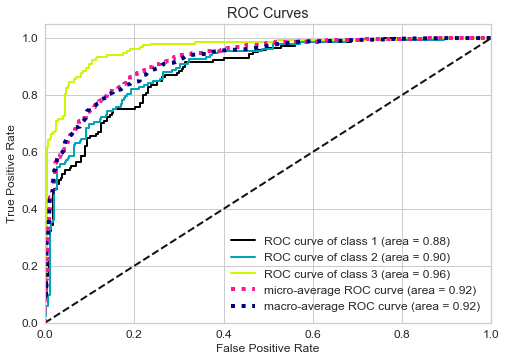

In [19]:
#AUC-figure1
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test,y_probas)

plt.savefig("fig2.pdf")
plt.show()

In [21]:
pd.set_option('max_row',100)
importance=pd.DataFrame(predictor.feature_importance(test_data))
importance

Computing feature importance via permutation shuffling for 94 features using 427 rows with 5 shuffle sets...
	1968.97s	= Expected runtime (393.79s per shuffle set)
	373.03s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Tilt Angle,0.046370,0.004505,0.000011,5,0.055645,0.037095
Angle Subtended by the Hydrophobic Residues,0.022951,0.011158,0.005018,5,0.045925,-0.000024
Propensity to in vitro Aggregation,0.015925,0.006706,0.003023,5,0.029733,0.002117
Net Charge,0.011710,0.010073,0.030044,5,0.032450,-0.009031
Length,0.010304,0.004856,0.004503,5,0.020304,0.000305
BLOSUM10,0.009836,0.004189,0.003149,5,0.018462,0.001210
Basic_Mole.,0.009836,0.005591,0.008525,5,0.021349,-0.001676
ProtFP7,0.008899,0.005591,0.011803,5,0.020412,-0.002613
KF9,0.007494,0.004189,0.008065,5,0.016120,-0.001132
Aromatic_Mole.,0.007494,0.006062,0.025311,5,0.019976,-0.004987


In [22]:
importance.to_csv('importance.csv',sep=',',index=True,header=True)

In [23]:
res_leaderboard.to_csv('res_leaderboard.csv',sep=',',index=True,header=True)